In [1]:
#import jax.numpy as np
#from jax import pmap
import numpy as np
from maxnorm.maxnorm_completion import *
from maxnorm.tenalg import *
from maxnorm.graphs import *
import sparse
from itertools import product
import networkx as nx

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%load_ext autoreload

C:\Users\AARea\Documents\IMPORTANT DOCS\SCHOOL\Graduate\Fall 2022\CSCI 692\max-qnorm-tensor-completion\maxnorm\maxnorm_completion.py:117: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if init is not 'alt_min':


In [2]:
# create random, low-rank tensor
t = 5
n = 30
r = 3
max_iterations = 100
epsilons = np.logspace(-4, 0, 5)
epsilons = np.concatenate((np.array(0), epsilons), axis = None)
#delta = 0.1
const = 24
sigma = 0.005
ndata =  const * r * t * n * np.log10(n)
U = kr_random(n, t, r, rvs='unif')
U = kr_rescale(U, np.sqrt(n**t), 'hs')
norm_true = np.sqrt(kr_dot(U, U) / n**t)
#U = [np.random.randn(n, r) for i in range(t)]
print("n data: %.2e" % ndata)
print("n data ** t/2: %.2e" % int(const * r * n**(t/2) * np.log10(n)))
print("true norm: %.2e" % norm_true)

n data: 1.60e+04
n data ** t/2: 5.24e+05
true norm: 1.00e+00


In [3]:
qnorm_true = max_qnorm_ub(U)
print(qnorm_true)
print(r**(t/2))

51.89459726494647
15.588457268119896


In [4]:
expander = nx.random_regular_graph(6, n)
#expander = nx.chordal_cycle_graph(n)
observation_mask = obs_mask_expander(expander, t)
#observation_mask = obs_mask_iid(tuple([n for i in range(t)]), ndata * n**(-t))

In [5]:
from run_sweep_iid import generate_data


data = generate_data(observation_mask, U, sigma)
clean_data_rmse = np.sqrt(loss(U, data) / data.nnz)
print(data.nnz)
print(ndata)
print(n**t)
print("%0.1e%%" % (float(data.nnz) / n**t * 100))

38880
15952.909550972354
24300000
1.6e-01%


In [6]:
%autoreload
Unew1, cost_arr = tensor_completion_alt_min(data, 2 * r**t,
                                            #sgd=True, sgd_batch_size=2000,
                                            #U0 = Unew2,
                                            init='svdrand', 
                                            tol=1e-10, max_iter=max_iterations, verbosity=1)

Initial cost: 1.802e+04
|| r || = 9.625e-01


Iteration 0 complete
|| resid || = 2.210e-01
Cost :        1.807e+03


Iteration 1 complete
|| resid || = 7.813e-02
Cost :        7.604e+02


Iteration 2 complete
|| resid || = 4.890e-02
Cost :        5.972e+02


Iteration 3 complete
|| resid || = 3.796e-02
Cost :        5.258e+02


Iteration 4 complete
|| resid || = 3.213e-02
Cost :        4.822e+02


Iteration 5 complete
|| resid || = 2.786e-02
Cost :        4.467e+02


Iteration 6 complete
|| resid || = 2.506e-02
Cost :        4.203e+02


Iteration 7 complete
|| resid || = 2.326e-02
Cost :        3.983e+02


Iteration 8 complete
|| resid || = 2.212e-02
Cost :        3.793e+02


Iteration 9 complete
|| resid || = 2.109e-02
Cost :        3.628e+02


Iteration 10 complete
|| resid || = 2.029e-02
Cost :        3.478e+02


Iteration 11 complete
|| resid || = 1.954e-02
Cost :        3.345e+02


Iteration 12 complete
|| resid || = 1.901e-02
Cost :        3.224e+02


Iteration 13 complete
|| res


Iteration 62 complete
|| resid || = 1.346e-02
Cost :        1.465e+02


Iteration 63 complete
|| resid || = 1.332e-02
Cost :        1.453e+02


Iteration 64 complete
|| resid || = 1.328e-02
Cost :        1.440e+02


Iteration 65 complete
|| resid || = 1.320e-02
Cost :        1.429e+02


Iteration 66 complete
|| resid || = 1.327e-02
Cost :        1.417e+02


Iteration 67 complete
|| resid || = 1.319e-02
Cost :        1.406e+02


Iteration 68 complete
|| resid || = 1.312e-02
Cost :        1.395e+02


Iteration 69 complete
|| resid || = 1.308e-02
Cost :        1.384e+02


Iteration 70 complete
|| resid || = 1.294e-02
Cost :        1.373e+02


Iteration 71 complete
|| resid || = 1.298e-02
Cost :        1.363e+02


Iteration 72 complete
|| resid || = 1.297e-02
Cost :        1.353e+02


Iteration 73 complete
|| resid || = 1.289e-02
Cost :        1.343e+02


Iteration 74 complete
|| resid || = 1.287e-02
Cost :        1.333e+02


Iteration 75 complete
|| resid || = 1.278e-02
Cost :        1.3

In [7]:
def print_factor_norms(U):
    print("fro:   " + str([np.linalg.norm(Ui,'fro')**2 for Ui in U]))
    print("2-inf: " + str([np.max(np.linalg.norm(Ui, axis=1)) for Ui in U]))

print_factor_norms(kr_balance_factors(U))

fro:   [69.87609334697315, 69.87609334697315, 69.87609334697318, 69.87609334697315, 69.87609334697315]
2-inf: [2.07101541027064, 2.1262377876218244, 2.2497139120970533, 2.330091493060419, 2.2204119230923736]


In [8]:
delta = 1.5 * sigma
#np.sqrt(np.sum((data.data - clean_data)**2)) * 2 / np.sqrt(data.nnz) * 1.5

print("rms of data:        %f" % clean_data_rmse)
print("delta parameter:    %f" % delta)
print("rmse of U true:     %f" % np.sqrt(loss(U, data) / data.nnz))

rms of data:        0.005027
delta parameter:    0.007500
rmse of U true:     0.005027


In [9]:
#Uinit = kr_rescale(Unew1, np.sqrt(np.product(data.shape) * data.sum() ** 2 / data.nnz), 'hs')
Uinit = kr_balance_factors(Unew1)

In [10]:
%autoreload
Unew2_list = []
cost_arr_list = []
for eps in epsilons:
    print("eps = ", eps)
    Unew2, cost_arr = tensor_completion_maxnorm(data, 4 * r**t, 0.1 * np.sqrt(data.nnz), epsilon=eps,
                                                #sgd=True, sgd_batch_size=2000,
                                                U0 = kr_balance_factors(Unew1),
                                                init='svdrand',
                                                kappa=100, beta=1, 
                                                tol=1e-10, inner_tol=1e-12, max_iter=max_iterations, inner_max_iter=10, 
                                                verbosity=1, inner_line_iter=40,
                                                rebalance=True)
    Unew2_list.append(Unew2)
    cost_arr_list.append(cost_arr)


eps =  0.0
Initial cost: 5.035e+04
Initial qnorm_ub: 5.034e+04
|| r || = 1.182e-02, delta = 1.000e-01

Iteration 0 complete


scaled || r || = 1.047e-01, delta = 1.000e-01
Max-qnorm upper bound: 1.525e+04
Cost function:         1.548e+04



Iteration 1 complete


scaled || r || = 1.019e-01, delta = 1.000e-01
Max-qnorm upper bound: 8.216e+03
Cost function:         8.418e+03



Iteration 2 complete


scaled || r || = 1.008e-01, delta = 1.000e-01
Max-qnorm upper bound: 5.820e+03
Cost function:         6.016e+03



Iteration 3 complete


scaled || r || = 9.227e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.666e+03
Cost function:         3.830e+03



Iteration 4 complete


scaled || r || = 7.597e-02, delta = 1.000e-01
Max-qnorm upper bound: 2.384e+03
Cost function:         2.495e+03



Iteration 5 complete


scaled || r || = 6.501e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.713e+03
Cost function:         1.794e+03



Iteration 6 complete


scaled || r || = 5.472e-02, delta = 1.000e-01



Iteration 41 complete


scaled || r || = 1.658e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.280e+02
Cost function:         1.333e+02



Iteration 42 complete


scaled || r || = 1.675e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.250e+02
Cost function:         1.304e+02



Iteration 43 complete


scaled || r || = 1.691e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.222e+02
Cost function:         1.277e+02



Iteration 44 complete


scaled || r || = 1.705e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.195e+02
Cost function:         1.251e+02



Iteration 45 complete


scaled || r || = 1.715e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.170e+02
Cost function:         1.226e+02



Iteration 46 complete


scaled || r || = 1.724e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.146e+02
Cost function:         1.203e+02



Iteration 47 complete


scaled || r || = 1.732e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.123e+02
Cost function:         1.180e+02



Iteration 48 complete


sc


Iteration 83 complete


scaled || r || = 1.513e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.639e+01
Cost function:         7.080e+01



Iteration 84 complete


scaled || r || = 1.506e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.585e+01
Cost function:         7.022e+01



Iteration 85 complete


scaled || r || = 1.500e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.532e+01
Cost function:         6.965e+01



Iteration 86 complete


scaled || r || = 1.493e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.480e+01
Cost function:         6.909e+01



Iteration 87 complete


scaled || r || = 1.486e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.429e+01
Cost function:         6.854e+01



Iteration 88 complete


scaled || r || = 1.480e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.379e+01
Cost function:         6.800e+01



Iteration 89 complete


scaled || r || = 1.474e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.330e+01
Cost function:         6.748e+01



Iteration 90 complete


sc


Iteration 23 complete


scaled || r || = 1.460e-02, delta = 1.000e-01
Max-qnorm upper bound: 2.548e+02
Cost function:         2.590e+02



Iteration 24 complete


scaled || r || = 1.418e-02, delta = 1.000e-01
Max-qnorm upper bound: 2.433e+02
Cost function:         2.473e+02



Iteration 25 complete


scaled || r || = 1.413e-02, delta = 1.000e-01
Max-qnorm upper bound: 2.304e+02
Cost function:         2.343e+02



Iteration 26 complete


scaled || r || = 1.406e-02, delta = 1.000e-01
Max-qnorm upper bound: 2.196e+02
Cost function:         2.235e+02



Iteration 27 complete


scaled || r || = 1.406e-02, delta = 1.000e-01
Max-qnorm upper bound: 2.093e+02
Cost function:         2.132e+02



Iteration 28 complete


scaled || r || = 1.412e-02, delta = 1.000e-01
Max-qnorm upper bound: 2.008e+02
Cost function:         2.047e+02



Iteration 29 complete


scaled || r || = 1.425e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.923e+02
Cost function:         1.963e+02



Iteration 30 complete


sc


Iteration 65 complete


scaled || r || = 1.655e-02, delta = 1.000e-01
Max-qnorm upper bound: 8.003e+01
Cost function:         8.535e+01



Iteration 66 complete


scaled || r || = 1.647e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.905e+01
Cost function:         8.431e+01



Iteration 67 complete


scaled || r || = 1.639e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.808e+01
Cost function:         8.329e+01



Iteration 68 complete


scaled || r || = 1.631e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.714e+01
Cost function:         8.230e+01



Iteration 69 complete


scaled || r || = 1.622e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.621e+01
Cost function:         8.132e+01



Iteration 70 complete


scaled || r || = 1.614e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.532e+01
Cost function:         8.039e+01



Iteration 71 complete


scaled || r || = 1.606e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.445e+01
Cost function:         7.946e+01



Iteration 72 complete


sc


Iteration 5 complete


scaled || r || = 6.502e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.713e+03
Cost function:         1.795e+03



Iteration 6 complete


scaled || r || = 5.473e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.329e+03
Cost function:         1.388e+03



Iteration 7 complete


scaled || r || = 4.627e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.108e+03
Cost function:         1.151e+03



Iteration 8 complete


scaled || r || = 3.942e-02, delta = 1.000e-01
Max-qnorm upper bound: 9.370e+02
Cost function:         9.681e+02



Iteration 9 complete


scaled || r || = 3.427e-02, delta = 1.000e-01
Max-qnorm upper bound: 8.072e+02
Cost function:         8.309e+02



Iteration 10 complete


scaled || r || = 3.028e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.031e+02
Cost function:         7.218e+02



Iteration 11 complete


scaled || r || = 2.707e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.254e+02
Cost function:         6.405e+02



Iteration 12 complete


scaled 


Iteration 47 complete


scaled || r || = 1.731e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.121e+02
Cost function:         1.184e+02



Iteration 48 complete


scaled || r || = 1.738e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.099e+02
Cost function:         1.163e+02



Iteration 49 complete


scaled || r || = 1.745e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.078e+02
Cost function:         1.142e+02



Iteration 50 complete


scaled || r || = 1.742e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.054e+02
Cost function:         1.118e+02



Iteration 51 complete


scaled || r || = 1.743e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.030e+02
Cost function:         1.094e+02



Iteration 52 complete


scaled || r || = 1.743e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.008e+02
Cost function:         1.071e+02



Iteration 53 complete


scaled || r || = 1.738e-02, delta = 1.000e-01
Max-qnorm upper bound: 9.864e+01
Cost function:         1.050e+02



Iteration 54 complete


sc


Iteration 89 complete


scaled || r || = 1.474e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.321e+01
Cost function:         6.784e+01



Iteration 90 complete


scaled || r || = 1.468e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.272e+01
Cost function:         6.731e+01



Iteration 91 complete


scaled || r || = 1.462e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.226e+01
Cost function:         6.681e+01



Iteration 92 complete


scaled || r || = 1.456e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.179e+01
Cost function:         6.631e+01



Iteration 93 complete


scaled || r || = 1.451e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.133e+01
Cost function:         6.582e+01



Iteration 94 complete


scaled || r || = 1.445e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.088e+01
Cost function:         6.534e+01



Iteration 95 complete


scaled || r || = 1.440e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.041e+01
Cost function:         6.484e+01



Iteration 96 complete


sc


Iteration 29 complete


scaled || r || = 1.328e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.918e+02
Cost function:         2.020e+02



Iteration 30 complete


scaled || r || = 1.344e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.840e+02
Cost function:         1.942e+02



Iteration 31 complete


scaled || r || = 1.360e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.773e+02
Cost function:         1.874e+02



Iteration 32 complete


scaled || r || = 1.391e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.705e+02
Cost function:         1.808e+02



Iteration 33 complete


scaled || r || = 1.423e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.644e+02
Cost function:         1.747e+02



Iteration 34 complete


scaled || r || = 1.460e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.587e+02
Cost function:         1.692e+02



Iteration 35 complete


scaled || r || = 1.498e-02, delta = 1.000e-01
Max-qnorm upper bound: 1.535e+02
Cost function:         1.641e+02



Iteration 36 complete


sc


Iteration 71 complete


scaled || r || = 1.596e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.242e+01
Cost function:         8.199e+01



Iteration 72 complete


scaled || r || = 1.588e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.168e+01
Cost function:         8.118e+01



Iteration 73 complete


scaled || r || = 1.581e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.095e+01
Cost function:         8.039e+01



Iteration 74 complete


scaled || r || = 1.573e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.024e+01
Cost function:         7.961e+01



Iteration 75 complete


scaled || r || = 1.566e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.957e+01
Cost function:         7.888e+01



Iteration 76 complete


scaled || r || = 1.559e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.892e+01
Cost function:         7.816e+01



Iteration 77 complete


scaled || r || = 1.552e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.829e+01
Cost function:         7.747e+01



Iteration 78 complete


sc


Iteration 11 complete


scaled || r || = 2.585e-02, delta = 1.000e-01
Max-qnorm upper bound: 5.569e+02
Cost function:         6.656e+02



Iteration 12 complete


scaled || r || = 2.343e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.962e+02
Cost function:         5.986e+02



Iteration 13 complete


scaled || r || = 2.164e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.442e+02
Cost function:         5.416e+02



Iteration 14 complete


scaled || r || = 2.002e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.021e+02
Cost function:         4.952e+02



Iteration 15 complete


scaled || r || = 1.883e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.662e+02
Cost function:         4.556e+02



Iteration 16 complete


scaled || r || = 1.770e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.341e+02
Cost function:         4.202e+02



Iteration 17 complete


scaled || r || = 1.660e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.096e+02
Cost function:         3.929e+02



Iteration 18 complete


sc


Iteration 53 complete


scaled || r || = 1.389e-02, delta = 1.000e-01
Max-qnorm upper bound: 8.239e+01
Cost function:         1.364e+02



Iteration 54 complete


scaled || r || = 1.417e-02, delta = 1.000e-01
Max-qnorm upper bound: 8.115e+01
Cost function:         1.350e+02



Iteration 55 complete


scaled || r || = 1.443e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.998e+01
Cost function:         1.337e+02



Iteration 56 complete


scaled || r || = 1.467e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.888e+01
Cost function:         1.325e+02



Iteration 57 complete


scaled || r || = 1.490e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.783e+01
Cost function:         1.313e+02



Iteration 58 complete


scaled || r || = 1.510e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.683e+01
Cost function:         1.302e+02



Iteration 59 complete


scaled || r || = 1.529e-02, delta = 1.000e-01
Max-qnorm upper bound: 7.589e+01
Cost function:         1.291e+02



Iteration 60 complete


sc


Iteration 95 complete


scaled || r || = 1.569e-02, delta = 1.000e-01
Max-qnorm upper bound: 5.722e+01
Cost function:         1.046e+02



Iteration 96 complete


scaled || r || = 1.568e-02, delta = 1.000e-01
Max-qnorm upper bound: 5.692e+01
Cost function:         1.042e+02



Iteration 97 complete


scaled || r || = 1.567e-02, delta = 1.000e-01
Max-qnorm upper bound: 5.663e+01
Cost function:         1.038e+02



Iteration 98 complete


scaled || r || = 1.567e-02, delta = 1.000e-01
Max-qnorm upper bound: 5.634e+01
Cost function:         1.034e+02



Iteration 99 complete


scaled || r || = 1.566e-02, delta = 1.000e-01
Max-qnorm upper bound: 5.605e+01
Cost function:         1.030e+02



finished in 100 iterations


scaled || r || = 1.566e-02, delta = 1.000e-01
Max-qnorm upper bound: 5.605e+01
Cost function:         1.030e+02
eps =  1.0
Initial cost: 5.313e+04
Initial qnorm_ub: 5.034e+04
|| r || = 1.182e-02, delta = 1.000e-01

Iteration 0 complete


scaled || r || = 1.048e-01, delta = 1


Iteration 35 complete


scaled || r || = 1.631e-02, delta = 1.000e-01
Max-qnorm upper bound: 5.011e+01
Cost function:         3.809e+02



Iteration 36 complete


scaled || r || = 1.642e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.922e+01
Cost function:         3.736e+02



Iteration 37 complete


scaled || r || = 1.654e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.840e+01
Cost function:         3.669e+02



Iteration 38 complete


scaled || r || = 1.660e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.769e+01
Cost function:         3.605e+02



Iteration 39 complete


scaled || r || = 1.665e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.702e+01
Cost function:         3.539e+02



Iteration 40 complete


scaled || r || = 1.668e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.641e+01
Cost function:         3.477e+02



Iteration 41 complete


scaled || r || = 1.669e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.586e+01
Cost function:         3.418e+02



Iteration 42 complete


sc


Iteration 77 complete


scaled || r || = 1.684e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.932e+01
Cost function:         2.494e+02



Iteration 78 complete


scaled || r || = 1.685e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.930e+01
Cost function:         2.484e+02



Iteration 79 complete


scaled || r || = 1.685e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.928e+01
Cost function:         2.475e+02



Iteration 80 complete


scaled || r || = 1.685e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.926e+01
Cost function:         2.465e+02



Iteration 81 complete


scaled || r || = 1.685e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.924e+01
Cost function:         2.457e+02



Iteration 82 complete


scaled || r || = 1.684e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.922e+01
Cost function:         2.448e+02



Iteration 83 complete


scaled || r || = 1.684e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.921e+01
Cost function:         2.440e+02



Iteration 84 complete


sc

In [11]:
qnorm_max = max_qnorm_ub(Unew2)
print(qnorm_max)

38.98378453907835


In [12]:
expander_eigs = np.abs(nx.linalg.adjacency_spectrum(expander))
expander_eigs.sort()
print(expander_eigs[-10:])

[2.64230486 2.9488548  3.04878423 3.17886719 3.30024758 3.41748785
 3.48817266 3.50782897 3.91902606 6.        ]


In [13]:
bound = 2**(2*t-4) * 1.8**(t-1) * (qnorm_max + qnorm_true)**2 * ((1 + expander_eigs[-2]/expander_eigs[-1])**(t-1) - 1)
print(bound)
print(bound / n**t)

35895360.56823332
1.4771753320260625


In [33]:
for i in range(len(Unew2_list)):
    print("eps = {}".format(epsilons[i]))
    print("loss of U true:     %.3e" % np.sqrt(loss(U, data) / data.nnz))
    print("loss of U max:      %.3e\n" % np.sqrt(loss(Unew2_list[i], data) / data.nnz))

eps = 0.0
loss of U true:     5.027e-03
loss of U max:      1.421e-02

eps = 0.0001
loss of U true:     5.027e-03
loss of U max:      1.421e-02

eps = 0.001
loss of U true:     5.027e-03
loss of U max:      1.422e-02

eps = 0.01
loss of U true:     5.027e-03
loss of U max:      1.427e-02

eps = 0.1
loss of U true:     5.027e-03
loss of U max:      1.566e-02

eps = 1.0
loss of U true:     5.027e-03
loss of U max:      1.676e-02



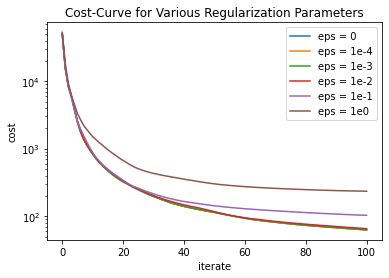

In [23]:
import matplotlib.pyplot as plt

plt.semilogy(cost_arr_list[0])
plt.semilogy(cost_arr_list[1])
plt.semilogy(cost_arr_list[2])
plt.semilogy(cost_arr_list[3])
plt.semilogy(cost_arr_list[4])
plt.semilogy(cost_arr_list[5])

plt.legend(["eps = 0", "eps = 1e-4", "eps = 1e-3", "eps = 1e-2", "eps = 1e-1", "eps = 1e0"])
plt.xlabel('iterate')
plt.ylabel('cost')
plt.title("Cost-Curve for Various Regularization Parameters")
plt.savefig('Cost-Curve.png')

## Generalization error

In [35]:
def gen_err(Upred, Utrue):
    norm_true = kr_dot(Utrue, Utrue)
    mse_gen = kr_dot(Upred, Upred) + norm_true - 2 * kr_dot(Upred, Utrue)
    return np.sqrt(mse_gen / norm_true)

def mse_gen_err(Upred, Utrue):
    norm_true = kr_dot(Utrue, Utrue)
    mse_gen = kr_dot(Upred, Upred) + norm_true - 2 * kr_dot(Upred, Utrue)
    return np.sqrt(mse_gen / Upred[0].shape[0] ** len(Upred))


for i in range(len(Unew2_list)):
    print("eps = {}".format(epsilons[i]))
    print("relative RMSE max:      %1.4e" % gen_err(Unew2_list[i], U))
    print("MSE max:                %1.4e\n" % mse_gen_err(Unew2_list[i], U))

eps = 0.0
relative RMSE max:      2.8930e-02
MSE max:                2.8930e-02

eps = 0.0001
relative RMSE max:      2.8931e-02
MSE max:                2.8931e-02

eps = 0.001
relative RMSE max:      2.8940e-02
MSE max:                2.8940e-02

eps = 0.01
relative RMSE max:      2.9076e-02
MSE max:                2.9076e-02

eps = 0.1
relative RMSE max:      3.0496e-02
MSE max:                3.0496e-02

eps = 1.0
relative RMSE max:      3.6626e-02
MSE max:                3.6626e-02



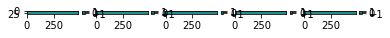

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axs = plt.subplots(1,t, figsize=(6, 20))
for i in range(t):
    im = axs[i].imshow(Unew2[i])
    divider = make_axes_locatable(axs[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    if i > 0:
        axs[i].set_yticks([])

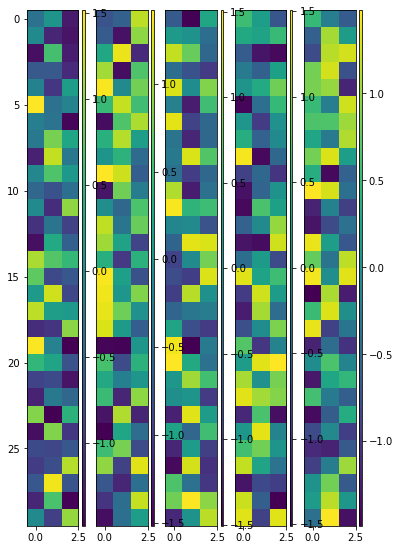

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axs = plt.subplots(1,t, figsize=(6, 20))
for i in range(t):
    im = axs[i].imshow(U[i])
    divider = make_axes_locatable(axs[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    if i > 0:
        axs[i].set_yticks([])